In [1]:
# prepare for Latex Output
from IPython.display import HTML,Latex

In [2]:
# Colored output in Python

W  = '\033[0m'  # white (normal)
K  = '\033[30m' # black
R  = '\033[31m' # red
G  = '\033[32m' # green
O  = '\033[1;33m' # orange
B  = '\033[34m' # blue
P  = '\033[35m' # purple
T =  '\033[1;33;47m' #Title

In [3]:
# sympy functions and properties 

from sympy import symbols,pprint,integrate,diff,latex,simplify,Matrix,Abs,Ei,erf,erfc,E
from sympy import pi,sqrt,sin,cos,log,exp,oo,E,tan,Piecewise,asin,atan


from sympy.abc import rho,theta,phi
import matplotlib.pyplot as plt 
#
import numpy as np 
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [4]:
# Variable declared
# x,y,z: variable Cartesian Corrdinates
# r,Theta: r,𝛉 in Polar Coordinates
# Rho,Theta,Phi: 𝛒, 𝛉, 𝛟 in Spherical Coordinates

x,y,z,u,v,w=symbols("x y z u v w")
Theta,Phi=symbols("theta,phi")
r,Rho=symbols("r,rho",positive=True)

In [5]:
def Jacobian_det(XU,U):
    """
    Calculate the Jacobian, 𝛛X/𝛛U
    input: XU: original coordinates, X, in form of new coordinates, U,
           U: new Coordinates 
    output: absolute value of determinant of Jacobian       
    """
    
    MX=Matrix(XU)
    MU=Matrix(U)
    S= MX.jacobian(MU )     
    return simplify(Abs(S.det()))

In [6]:
# Fix error return of MultipleIntegral

def MultipleIntegral(f,X,XR):
    """
    input: ∫ dx ∫ dy ∫ f(x,y,z) dz
           f: f(x,y,z),
           X: (x,y, ...), variable pair
           XR: [[x0,x1], [y0,y1],...] 
    output: details of integral, enhanced by colored text, and value       
    """
    f_latex=latex(eval(str(f)))
    
    XR0=[]
    X_tex=[]
    for var in XR:
        XR0.append([latex(eval(str(var[0]))),latex(eval(str(var[1])))])
    for var in X:
        X_tex.append(latex(eval(str(var))))
    
    dA=""
    for var in X_tex:
        dA+=" d %s " %(var)
    if len(X)==2:
       intsign="\iint"
    elif(len(X)==3):
       intsign="\iiint" 
    else:
        intsign="\Large{\int}"    
    
    # indefinte I of z
    I='I'+str(X[-1])
    IX=[integrate(f,X[-1])]
    IX_tex=[latex(eval(str(IX[0])))]
    int_g='\left.\color{brown}{%s} \\right|_{%s}^{%s}' %(IX_tex[0],XR0[-1][0],XR0[-1][1])
    Integrand_tex_val=[int_g]

   
    Integrand=[f_latex]
    II='II'+str(X[-1])
    DIX=[integrate(f,(X[-1],XR[-1][0],XR[-1][1]))]
    DIX_tex=[latex(eval(str(DIX[0])))]
    n=len(X)
    i=0
    for var in X[len(X)-2::-1]:
        
        I='I'+str(var)
        while True:
            try:
                I=integrate(DIX[i],var)
                break
            except ValueError:
                #errortext="\\begin{eqnarray}"
                errortext="$$%s_{\Large{\mathbf{V}}} \color{brown}{%s} %s $$" %(intsign,f_latex,dA) 
                #errortext+="\end{eqnarray}"
                errortext+=("$\color{red}{\\text{Can't}}$ be integrated Here, Try another way ...")
                return Latex(errortext)
        #I=integrate(DIX[i],var)
        IX.append(I)
        IX_tex.append(latex(eval(str(I))))
        Integrand_tex_val.append('\left. \color{brown}{%s} \\right|_{%s}^{%s}' %(IX_tex[-1],XR0[n-i-2][0],XR0[n-i-2][1]) )
        II='II'+str(var)
        II=integrate(DIX[i],(var,XR[-i-2][0],XR[-i-2][1]))
        DIX.append(II)
        DIX_tex.append(latex(eval(str(II))))
        i+=1
        
    for I_f in DIX[:-1]:
        Integrand.append(latex(eval(str(I_f))))

    text0="\\begin{eqnarray}"
    text5="\end{eqnarray}"
    
    #domain="\large{\left\{"
    domain="\left\{\large{\\begin{array}{l}"
    i=0
    for var in X_tex:
        domain=domain+" %s \le %s \le %s,\cr" %(XR0[i][0],var,XR0[i][1])
        i+=1
    #domain+="\\right\}}"
    domain+="\end{array}}\\right\}"
    
        
    #dA=""
    #for var in X_tex:
    #    dA+=" d %s " %(var)
    
    textF="%s_{\Large{\mathbf{V}}=%s} \color{brown}{%s} dV&=& %s_{\Large{\mathbf{V}}} \color{brown}{%s} %s \cr " %(intsign,domain,f_latex,intsign,f_latex,dA)
    fubini="\color{blue}{\\text{Fubini's Theorem}}"
    
    textfI=""
    for i in range(len(X)):
        j=0
        if (i==0):
            eq1="%s&=&" %(fubini)
        else:
            eq1="&=&"
        textfI+=eq1  
        for var in X_tex[:len(X)-i-1:]:
            textfI+="\int_{%s}^{%s}d{%s}" %(XR0[j][0],XR0[j][1],var)
            j+=1
        #print(i,len(Integrand),len(X))  
        textfI+="\int_{%s}^{%s} \color{brown}{%s}d{%s}\cr "  %(XR0[-i-1][0],XR0[-i-1][1],Integrand[i],X_tex[-i-1])
        
        textfI+="&=&"
        int_pre=""

        for k in range(len(X)-i-2):
            int_pre+="\int_{%s}^{%s} d{%s}" %(XR0[k][0],XR0[k][1],X_tex[k])
        if len(X)-i-1>0: 
            int_ev="\int_{%s}^{%s} %s d{%s}" %(XR0[-i-2][0],XR0[-i-2][1],Integrand_tex_val[i],X_tex[-i-2])
        else:
            int_ev="%s" %(Integrand_tex_val[-1])
        textfI+=int_pre+int_ev+'\cr'
    textfI+='&=&%s' %(DIX_tex[-1])   

    text=text0+textF+textfI+text5

    return Latex(text)

In [7]:
def XY_UV(f,X_,U_,XU_):
    zipdict=zip(X_,XU_)
    formula=dict(zipdict)
    return (f+0*X_[0]).subs(formula)    

In [8]:
# visualisation by off-line plotly 

import plotly.offline as pyo
import plotly.express as ex
import plotly.graph_objects as go

pyo.init_notebook_mode()

In [9]:
# Regions(f_,X_,title="...")

def Regions(f_,X_,vert=[],title="f(x,y)"):
    
    text="$\Large{\iint_D "+title +"}$"
    fig = go.Figure(
             data = [go.Scatter(x=X_,y=f_[0], opacity=0.5)]                              
         )
    for f0 in f_[1:]: 
        fig.add_scatter(x=X_,y=f0,mode='lines') 
    for [x_,y_] in vert:
        fig.add_scatter(x=x_,y=y_)
    fig.update_layout(
       title = text,
       title_x=0.22, 
       width=500 ,
       height=500, 
    )
    fig.show()

<details>
<summary>
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
    <font size="6em">Triple Integral on Rectangular Solid</font>
  </a>    
</summary>

Similar to last section, we can consider the multiple integrations for
functions with three variables. If $w = f (x, y, z)$ is continuous and $f (x,
y, z)$ is nonnegative for all $(x, y, z)$ in a solid region $R$ of subset in
$\mathbb{R}^3$, then the triple integral of $f (x, y, z)$ and above $X - Y$
over $R$ is defined as
$$\Large{\iiint_Rf (x, y, z) d V = \lim_{\|
   \Delta \| \rightarrow 0} \sum_{i = 1}^n f (x_i, y_i, z_i) \Delta V_i }$$


where $\large{\Delta V_i = \Delta x_i \Delta y_i \Delta z_i }$, $\Delta \ast_i$being
the length of the partition subinterval in each direction respectively,  is
the element of volume and $\| \Delta \|$ is the longest length among $\Delta
\ast_i$'s. Fubini's theorem can be used to evaluate the triple integrals:

</details>

<p />
<details>
<summary>
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
    <font size="6em">Fubini's Theorem</font>
  </a>    
</summary>

 If $f (x, y, z)$ is continuous over $V$ and
  $$ R \text{=} \{ (x, y, z) | a \leqslant x \leqslant b, g_1 (x) \leqslant y
     \leqslant g_2 (x), h_1 (x, y) \leqslant z \leqslant h_2 (x, y) \}, $$
  then
$$ \large{\mathbf{\iiint\limits_{R}f (x, y, z) d V = \int_a^b d
     x \int_{g_1 (x)}^{g_{_2 (x)}} d y \int_{h_1 (x, y)}^{h_2 (x, y)} f (x, y,
     z) d z }}$$

where $\large{dV =dxdydz}$, called element of volume.
Certainly, the order of integrations can be changed as double integrals if
necessary. Note that if $f (x, y, z) \equiv 1$ then the value of triple
integral is equal to the volume of $R$.
</details>


**Evaluate Triple Integral by Iterated  Integration.** 

Example (Triple Integration on Rectangular solid)
---
Evaluate the following triple integral
$$ \mathbf{\iiint\limits_{-1\le x\le1,0\le y \le3,1\le z\le2}(x^2y+yz^2) d V = 24}$$

In [15]:
# 2021-05-27, $\int_D y/(x+1)dxdy$
f=x**2*y+y*z**2
X=[x,y,z]
XR=[[-1,1],[0,3],[1,2]]
MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Example (Triple Integration on non-Rectangular solid)
---
Evaluate the following triple integral
$$ \mathbf{\iiint\limits_{T}z d V =\frac{1}{12}} $$
where $T$ is the solid in the first octant and bounded by $z=1-x^2$ and $y\le x$.     

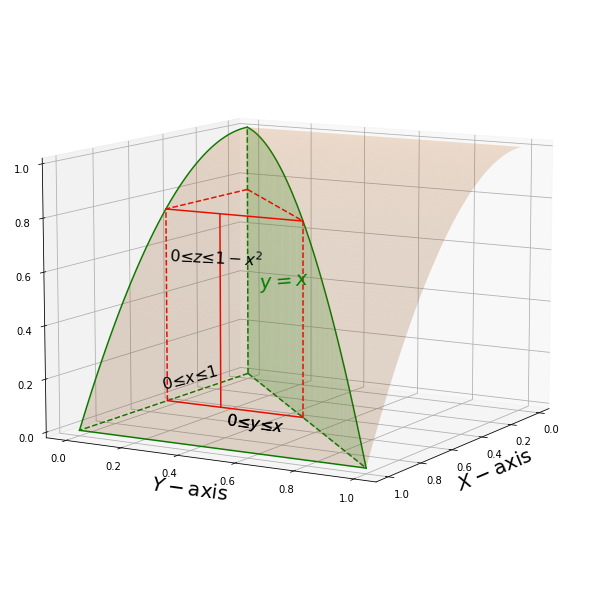

In [52]:
# Vis

fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
#ax.set_aspect('equal','box')

x0 = np.linspace(0, 1, 100)
y0 = np.linspace(0, 1, 100)
X,Y=np.meshgrid(x0,y0)
func= 1-X*X

ax.plot_surface(X,Y, func, rstride=1, cstride=1, color='C1',alpha=0.2)
t0 = np.linspace(0,1, 100)
for xs in t0:
    zs=np.linspace(0,1-xs**2,30)
    ax.plot(xs+0*zs,xs+0*zs,zs,color='C2',alpha=0.2)
    #ax.plot(xs+0*zs,0*zs,zs,color='C2',alpha=0.4)
ax.plot(x0,x0,1-x0*x0,color='g')    
ax.plot(x0,0*x0,1-x0*x0,color='g') 
ax.plot(1+0*x0,x0,0*x0,color='g') 
ax.plot(x0,0*x0,0*x0,'g--') 
ax.plot(x0,x0,0*x0,'g--') 
ax.plot(0*x0,0*x0,x0,'g--')

ax.plot([0,1/2],[0,1/2],[1-1/4,1-1/4],'r--')
ax.plot([0,1/2],[0,0],[1-1/4,1-1/4],'r--')

ax.text(0.6, 0.4, 0.5, r"$y= x$", (0,1,0.2),size=20,color='green')
ax.text(0.8, 0.2, 0.6, r"$0≤z≤1-x^2$", (0,1,0.05),size=16,color='black')

ax.text(0.7, 0.1, 0.1, r"$0 ≤ x ≤ 1$", (0,1,0.4),size=16)

x0=np.linspace(0, 1/2, 101)
ax.plot(1/2+0*x0,x0,3/4-0*x0,'r')
ax.plot(1/2+0*x0,x0,0,'r')

ax.plot([1/2,1/2],[0.2,0.2],[0,1-1/4],'r')
ax.plot([1/2,1/2],[0.,0.],[0,1-1/4],'r--')
ax.plot([1/2,1/2],[0.5,0.5],[0,1-1/4],'r--')

ax.text(0.8, 0.4, 0, r"$0 ≤ y ≤ x$", (0,1,-0.0),size=16)
ax.text(0.8, 0.4, 0, r"$0 ≤ y ≤ x$", (0,1,-0.0),size=16)


plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)
ax.view_init(elev=10, azim=30)

$\le x\le1$

In [17]:
# 2021-06-01, $\int_V zdxdydz$
f=z
X=[x,y,z]
XR=[[0,1],[0,x],[0,1-x**2]]
MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Example (Triple Integration on Cylinder-based solid)
---
Evaluate the following triple integral
$$ \mathbf{\iiint\limits_{T}\sqrt{x^2+z^2} d V  }$$
  

<details>
<summary>
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
    <font size="4em">where $T$ is the solid, bounded by $x^2+z^2=1,y+z=2$ and $y=0$.</font>
  </a>    
</summary>
1. \begin{eqnarray}
    y&\ge&0\cr
    x^2+z^2&\le1\cr
    y+z&\le2
\end{eqnarray} 
2. $[x,y,z]\to[x,z] and [y]$:
 1. \begin{eqnarray}
    &&0\le y\le 2-z, x^2+z^2\le1 \cr
   (x,z)=(r\cos\theta,r\sin\theta) \Rightarrow&&0\le y\le2- r \sin\theta, r^2\le1
\end{eqnarray}    
</details>

<b> Range of Domain</b>

In this case, we seperate the triple integral into 2 part, single-variable integral of $y$, from $0$ to $2-z$,
the other, double integral for $x,z$, in $R=\{x^2+z^2\le1\}$; use integration in polor coordinate to integrate the latter integral: 
$$ \mathbf{\iiint\limits_{T}\sqrt{x^2+z^2} d V =\iint\limits_{x^2+z^2\le1}dA\int^{2-z}_0\sqrt{x^2+z^2} dy} $$

And use Polar Coordinates:
$$\Large{(X,Z)\to (r\cos\theta,r\sin\theta)\text{ with } J=r\Rightarrow y=2-z=2-r\sin\theta}$$

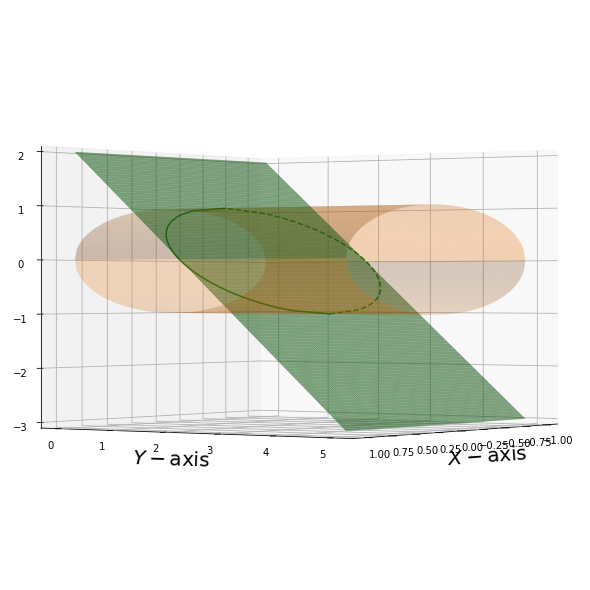

In [85]:
#viz
fig = plt.figure(figsize=(8,8))

ax = Axes3D(fig)
#ax.set_aspect('equal','box')

x0 = np.linspace(-1, 1, 100)
y0 = np.linspace(0, 5, 100)
X,Y=np.meshgrid(x0,y0)

ax.plot_surface(X,Y, np.sqrt(1-X**2), rstride=1, cstride=1, color='C1',alpha=0.3)
ax.plot_surface(X,Y, 2-Y, rstride=1, cstride=1, color='C2',alpha=0.6)

ax.plot_surface(X,Y, -np.sqrt(1-X**2), rstride=1, cstride=1, color='C1',alpha=0.25)

z0=np.linspace(-1,1,30)
ax.plot(np.sqrt(1-z0*z0),2-z0,z0,"g")
ax.plot(-np.sqrt(1-z0*z0),2-z0,z0,"g--")

plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)

ax.view_init(elev=0, azim=35)

In [52]:
# 2021-06-01, $\int_V zdxdydz$
f=r*r
X=[r,Theta,y]
XR=[[0,1],[0,2*pi],[0,2-r*sin(Theta)]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [24]:
# sqrt(4-x^2-y^2)
f1=sqrt(2**2-x**2-y**2)
rules={x**2+y**2: r**2,x:r*cos(Theta),y:r*sin(Theta)}
f_simply=simplify( f1.subs(rules) )
problem="Origin function,   $"+latex(eval(str(f1)))+"$, functions converted $"+latex(eval(str(f_simply)))+"$"
Latex(problem)

X=[x,y]
U=[r,Theta]
J=r
#XU=[Rho*cos(Theta)*sin(Phi),Rho*sin(Theta)*sin(Phi),Rho*cos(Phi)]
#XU=[r*cos(Theta),r*sin(Theta)]
UR=[[0,2],[0,2*pi]]
MultipleIntegral(f_simply*J,U,UR)

<IPython.core.display.Latex object>

$\large{(r,\theta, Z)}$, Cylindrical Coordinates
---
$$\large{[X,Y,Z]\Rightarrow [r\cos\theta,r\sin\theta,z]}$$

In [91]:
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid


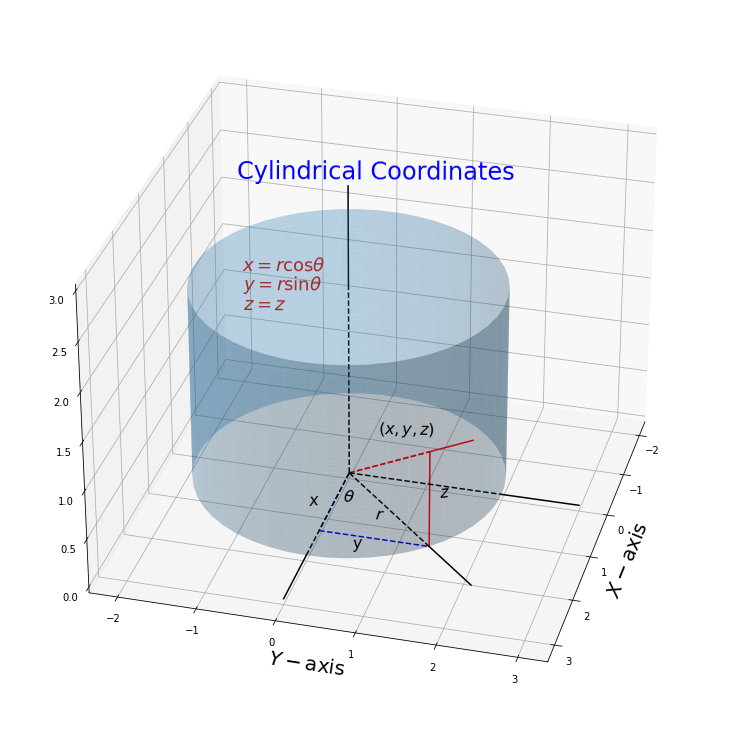

In [105]:
# cylinder
fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
Xc,Yc,Zc = data_for_cylinder_along_z(0,0.,2,2)
ax.plot_surface(Xc, Yc, Zc, alpha=0.3)

r0=np.sqrt(2)
ax.plot([0,np.sqrt(2)],[0,np.sqrt(2)],[0,1],'r--')
ax.plot([0,r0],[0,r0],[0,1],'r--')
ax.plot([r0,1.5*r0],[r0,1.5*r0],[1,1.5],'r')

ax.plot([np.sqrt(2),np.sqrt(2)],[np.sqrt(2),np.sqrt(2)],[0,1.],'r')
ax.plot([0,np.sqrt(2)],[0,0],[0,0],'b--')
ax.plot([np.sqrt(2),np.sqrt(2)],[0,np.sqrt(2)],[0,0],'b--')

ax.plot([0,0],[0,0],[2,2+1],'k',)
ax.plot([0,0],[0,0],[0,2],'k--')


plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)
r0=2
ax.plot([0,r0],[0,0],[0,0.],'k--')
ax.plot([r0,r0+1],[0,0],[0,0.],'k')
ax.plot([0,0],[0,r0],[0,0.],'k--')
ax.plot([0,0],[r0,r0+1],[0,0.],'k')
r00=np.sqrt(2)
ax.plot([0,r00],[0,r00],[0,0.],'k--')
ax.plot([r00,1.5*r00],[r00,1.5*r00],[0,0.],'k')

ax.text(0.7, -1.2, 3.2, 'Cylindrical Coordinates', (0,1,0.095),size=24,color='blue')

ax.text(0.7, 0.1, 0, '$\\theta$', (0,1,0),size=16)
ax.text(1, 0.6, 0, '$r$', (0,1,0),size=16)
ax.text(0.5, 1.3, 0.1, '$z$', (0,1,0.2),size=16)

ax.text(0.9,-0.3, 0, '$x$', (0,1,0.2),size=16)
ax.text(1.7, 0.5, 0., '$y$', (0,1,0.2),size=16)
ax.text(1.2,0.7,1., '$(x,y,z)$', (0,1,0.1),size=16)

ax.text(1.2,-1,2.5, '$x=r\cos\\theta$', (0,1,0.1),size=18,color='brown')
ax.text(1.2,-1,2.3, '$y=r\sin\\theta$', (0,1,0.1),size=18,color='brown')
ax.text(1.2,-1,2.1, '$z=z$', (0,1,0.1),size=18,color='brown')



ax.view_init(elev=30, azim=15)
plt.show()

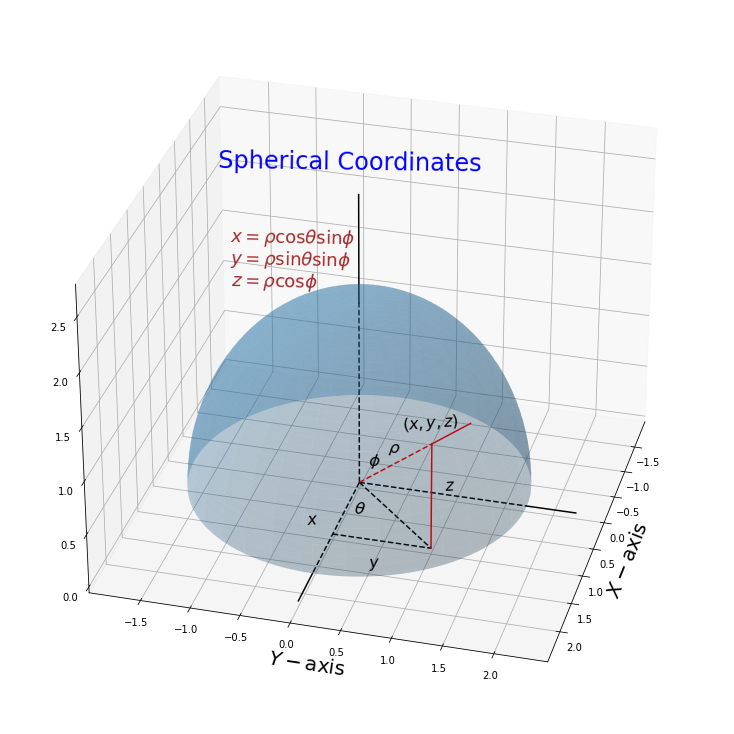

In [17]:
#
fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)

ax.text(0.7, -1.2, 3.1, 'Spherical Coordinates', (0,1,0.1),size=24,color='blue')

Xc=np.linspace(0,np.pi/2,101)
Yc=np.linspace(0,2*np.pi,101)
Xc,Yc=np.meshgrid(Xc,Yc)

X_=np.sqrt(3)*np.sin(Xc)*np.cos(Yc)
Y_=np.sqrt(3)*np.sin(Xc)*np.sin(Yc)
Z_=np.sqrt(3)*np.cos(Xc)
ax.plot_surface(X_, Y_, Z_, alpha=0.3)

r0=np.sqrt(3)
ax.plot([0,0],[0,0],[r0,r0+1],'k',)
ax.plot([0,0],[0,0],[0,r0],'k--')
ax.plot([1,1],[0,1],[0,0.],'k--')
ax.plot([0,r0],[0,0],[0,0.],'k--')
ax.plot([r0,r0+.5],[0,0],[0,0.],'k')
ax.plot([0,0],[0,r0],[0,0.],'k--')
ax.plot([0,0],[r0,r0+.5],[0,0.],'k')
ax.plot([0,1],[0,1],[0,0.],'k--')
ax.plot([0,1],[0,1],[0,1.],'r--')
ax.plot([1,1.5],[1,1.5],[1,1.5],'r')
ax.plot([1,1],[1,1],[0,1.],'r')

plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)

ax.text(0.6, 0.1, 0, '$\\theta$', (0,1,0),size=16)
ax.text(1, 0.55, 0.85, '$\\rho$', (0,1,0),size=16)
ax.text(1, 0.35, 0.7, '$\phi$', (0,1,0),size=16)
ax.text(0.5, 1., 0.3, '$z$', (0,1,0.2),size=16)

ax.text(0.9,-0.3, 0, '$x$', (0,1,0.2),size=16)
ax.text(1.5, 0.5, 0., '$y$', (0,1,0.2),size=16)
ax.text(1,0.7,1.1, '$(x,y,z)$', (0,1,0.2),size=16)

ax.text(1,-1,2.6, '$x=\\rho\cos\\theta\sin\phi$', (0,1,0.1),size=18,color='brown')
ax.text(1,-1,2.4, '$y=\\rho\sin\\theta\sin\phi$', (0,1,0.1),size=18,color='brown')
ax.text(1,-1,2.2, '$z=\\rho\cos\phi$', (0,1,0.1),size=18,color='brown')

ax.view_init(elev=30, azim=15)
plt.show()

<details>
<summary>
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
    <font size="6em">Fubini's Theorem on General Solid $\subset \mathbb{R}^3$</font>
  </a>    
</summary>

$$\Large{\mathbf{ \iiint\limits_Vf (x, y, z) d V =
     \underset{V}{\iiint} f (x (u, v, w), y (u, v, w), z (u, v, w))
     \color{brown}{||J||} d u d v d w} }$$
  
  
  where $(U,V,W)$ is General Coordinates for $\mathbb{R}^3$, and $||J||$ the absolute value of determinant of $|J|=\large{\left|\frac{\partial(x,y,z)}{\partial(u,v,w)}\right|}$. 


1. <details>
      <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
           <font size="4em">Fubini's Theorem on Cylindrical Coordinates</font>
        </a>    
     </summary>

    $$\large{\mathbf{ \iiint\limits_V f (x, y, z) d V =
     \underset{V}{\iiint} f (r \cos \theta, r \sin \theta, z) \color{brown}{r} d r d
     \theta d z }}$$    
    <font color="brown"><b>When do we use Cylindrical Coordinates? <b></font><br>
     - Sum of square of any two variables appears, $x^2+y^2$ for instance! 
    </details>  
    <b> Triple Integral in Cylindrical Coordinates</b>

2. <details>
      <summary>
        <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
           <font size="4em">Fubini's Theorem on Spherical Coordinates</font>
        </a>    
     </summary>  
     $$\large{\mathbf{ \iiint\limits_Vf (x, y, z) d V =
     \iiint\limits_V f (\rho \cos \theta \cos \phi, \rho \sin
     \theta \cos \phi, \rho \sin \phi) \color{brown}{\rho^2 \sin \phi} d \rho d \theta d \phi}}$$
    
    <font color="brown"><b>When do we use Sphereical Coordinates? <b></font><br>
     - Sum of square of three variables appears, $x^2+y^2+z^2$ for instance! 
   </details>      
    <b>Triple Integral in Spherical Coordinates</b>      
</details>

**Iterated  Integration.** 

Example
---
Evaluate triple integral of 
$$\large{\iiint_V \sqrt{x^2+y^2} d V }$$
where $V$ is bounded by $z = \sqrt{x^2 + y^2}$ and $z = 2$.


The solid region can be represented in cylindrical coordinates as:

\begin{eqnarray*}
      r \leqslant z \leqslant 2 &  & \\
      0 \leqslant r \leqslant 2 &  & \\
      0 \leqslant \theta \leqslant 2 \pi &  & 
    \end{eqnarray*}
and


\begin{eqnarray}
 f(x,y,z)&=&\sqrt{x^2+y^2}=r\cr
 \| J \| &=& \left| \frac{\partial (x, y, z)}{\partial (r, \theta, z)}
   \right| = \left| \left|\begin{array}{ccc}
     \cos \theta & \sin \theta & 0\\
     - r \sin \theta & r \cos \theta & 0\\
     0 & 0 & 1
   \end{array}\right| \right| = r \cr
\text{integrand =}&=&   f(x,y,z)\cdot |J|=r^2 
\end{eqnarray}

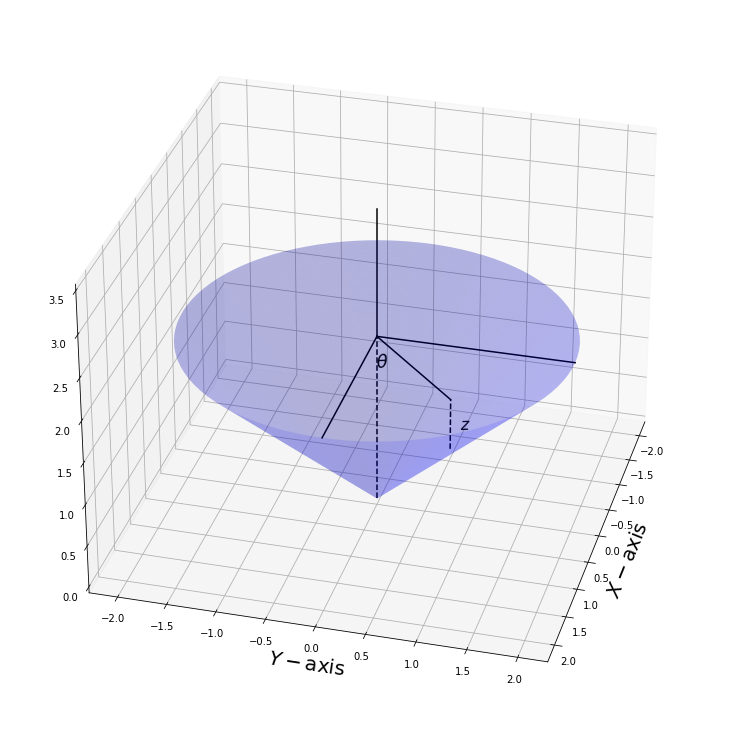

In [10]:
# viz sqrt(x^2+y^2)
fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
Rc=np.linspace(0,2,101)
Tc=np.linspace(0,2*np.pi,101)
Rc,Tc=np.meshgrid(Rc,Tc)

X_=Rc*np.cos(Tc)
Y_=Rc*np.sin(Tc)
Z_=2+0*X_
ax.plot_surface(X_, Y_, Z_, alpha=0.1,color='blue')
X_=Rc*np.cos(Tc)
Y_=Rc*np.sin(Tc)
f_=Rc
ax.plot_surface(X_, Y_, f_, alpha=0.2,color='blue')


r0=2
ax.plot([0,0],[0,0],[r0,r0+1.5],'k',)
ax.plot([0,0],[0,0],[0,r0],'k--')
ax.plot([0,2],[0,0],[r0,r0],'k',)
ax.plot([0,0],[0,2],[r0,r0],'k')
ax.plot([0,1],[0,1],[r0,r0],'k')
ax.plot([1,1],[1,1],[np.sqrt(r0),r0],'k--')

ax.text(0.6,0.15, 2, '$\\theta$', (0,1,0.2),size=18)
ax.text(0.6,1., 1.4, '$z$', (0,1,0.2),size=16)


plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)


ax.view_init(elev=30, azim=15)
plt.show()

In [169]:
# 2021-06-01, $\int_V sqrt(x^2+y^2) dxdydz$
f=r*r
X=[r,Theta,z]
XR=[[0,2],[0,2*pi],[r,2]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Example
---
Evaluate triple integral of 
$$\large{\iiint_V \sqrt{x^2+y^2} d V }$$
where $V$ is bounded by $z = {x^2 + y^2}$ and $z = 2$.


The solid region can be represented in cylindrical coordinates as:

\begin{eqnarray*}
      r^2 \leqslant z \leqslant 2 &  & \\
      0 \leqslant r \leqslant \sqrt2 &  & \\
      0 \leqslant \theta \leqslant 2 \pi &  & 
    \end{eqnarray*}
and
$$ f(x,y,z)=\sqrt{x^2+y^2}=r, J=r$$

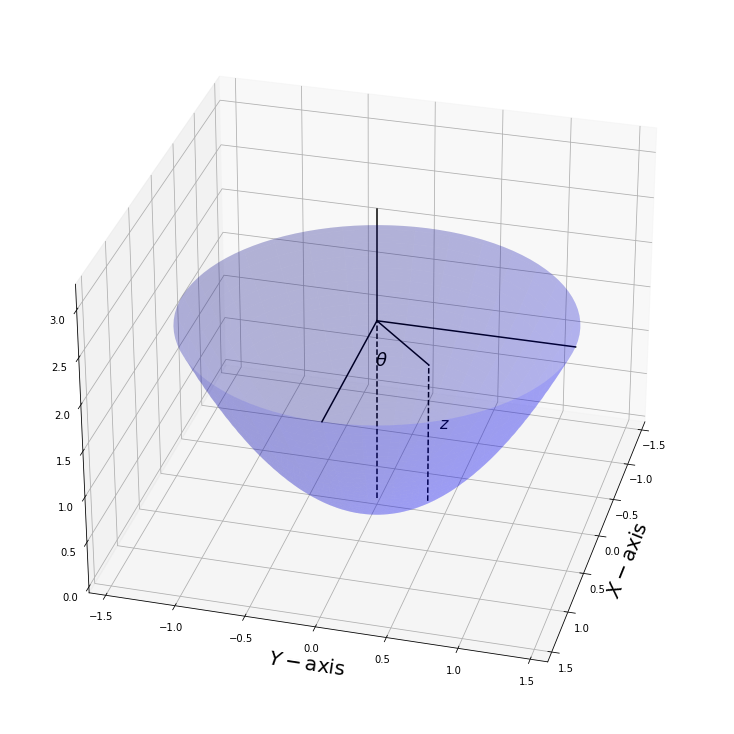

In [19]:
# viz sqrt(x^2+y^2)
fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
Rc=np.linspace(0,np.sqrt(2),101)
Tc=np.linspace(0,2*np.pi,101)
Rc,Tc=np.meshgrid(Rc,Tc)

X_=Rc*np.cos(Tc)
Y_=Rc*np.sin(Tc)
Z_=2+0*X_
ax.plot_surface(X_, Y_, Z_, alpha=0.1,color='blue')
X_=Rc*np.cos(Tc)
Y_=Rc*np.sin(Tc)
f_=Rc*Rc
ax.plot_surface(X_, Y_, f_, alpha=0.2,color='blue')


r0=2
ax.plot([0,0],[0,0],[r0,r0+1.2],'k',)
ax.plot([0,0],[0,0],[0,r0],'k--')
ax.plot([0,np.sqrt(r0)],[0,0],[r0,r0],'k',)
ax.plot([0,0],[0,np.sqrt(r0)],[r0,r0],'k')
ax.plot([0,1/2],[0,1/2],[r0,r0],'k')
ax.plot([1/2,1/2],[1/2,1/2],[1/2,r0],'k--')

ax.text(0.6,0.15, 2, '$\\theta$', (0,1,0.2),size=18)
ax.text(0.6,0.6, 1.4, '$z$', (0,1,0.2),size=16)


plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)


ax.view_init(elev=30, azim=15)
plt.show()

In [94]:
# 2021-06-01, $\int_V sqrt(x^2+y^2)dxdydz$
f=r*r
X=[r,Theta,z]
XR=[[0,sqrt(2)],[0,2*pi],[r**2,2]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>


Example
---
Evaluate triple integral of 
$$\large{\iiint_V {x^2+y^2} d V }$$
where $V$ is bounded by $ {x^2 + y^2}\le z$ and $x^2+y^2+z^2 = 2$.

Since at the intersction part of $ {x^2 + y^2}= z$ and $x^2+y^2+z^2 = 2$, we have:
$$ {x^2 + y^2}= z,x^2+y^2+z^2 = 2\Rightarrow z^2+z=2\to z=1\text{ and }r=\sqrt{x^2+y^2}=1$$  
The solid region can be represented in cylindrical coordinates as:

\begin{eqnarray*}
      r \le z \le \sqrt{2-r^2} &  & \\
      0 \le r \le1 &  & \\
      0 \le \theta \leq 2 \pi &  & 
    \end{eqnarray*}
and
$$ f(x,y,z)={x^2+y^2}=r^2, J=r$$

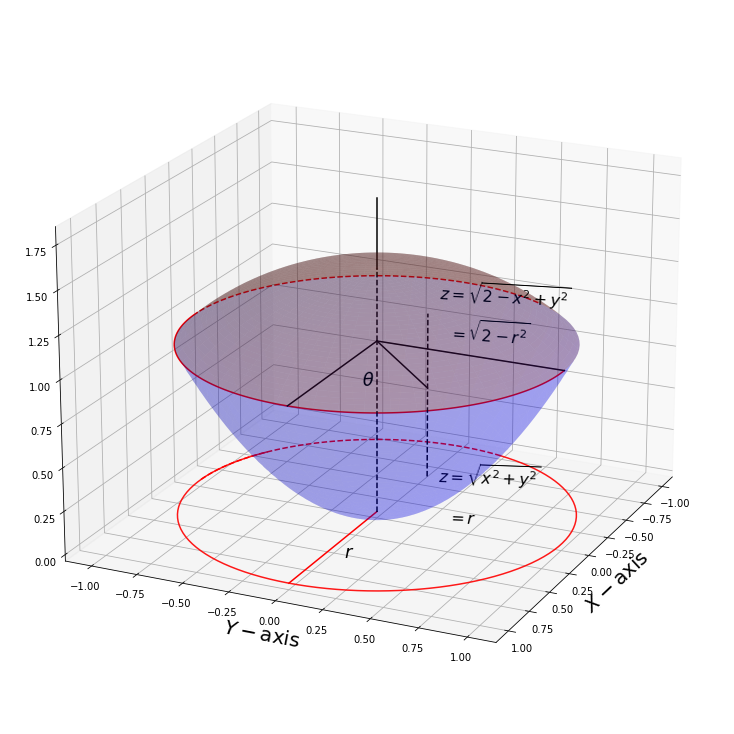

In [36]:
# viz sqrt(x^2+y^2)
fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)


# Spherical roof
TS=np.linspace(0,2*np.pi,101)
PS=np.linspace(0,np.pi/4,101)
TS,PS=np.meshgrid(Tc,PS)
RS=np.sqrt(2)
XS=RS*np.cos(TS)*np.sin(PS)
YS=RS*np.sin(TS)*np.sin(PS)
ZS=RS*np.cos(PS)
ax.plot_surface(XS, YS, ZS, alpha=0.3,color='brown')

# parabola bottom
Rc=np.linspace(0,1,101)
Tc=np.linspace(0,2*np.pi,101)
Rc,Tc=np.meshgrid(Rc,Tc)
X_=Rc*np.cos(Tc)
Y_=Rc*np.sin(Tc)
f_=Rc*Rc
ax.plot_surface(X_, Y_, f_, alpha=0.2,color='blue')


xb=np.linspace(-np.pi/2,np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb, 1+0*Xb,'r')

xb=np.linspace(5*np.pi/6,3*np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb, 1+0*Xb, 'r--')

xb=np.linspace(-4*np.pi/6,11*np.pi/12,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb,   0*Xb, alpha=0.9,color='red')
xb=np.linspace(11*np.pi/12,3*np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb,   0*Xb,'r--')


ax.plot([0,r0],[0,0],[0,0],'r')

r0=1
ax.plot([0,0],[0,0],[r0,RS],'k--',)
ax.plot([0,0],[0,0],[RS,RS+0.4],'k',)
ax.plot([0,0],[0,0],[0,r0],'k--')
ax.plot([0,np.sqrt(r0)],[0,0],[r0,r0],'k',)
ax.plot([0,0],[0,np.sqrt(r0)],[r0,r0],'k')
ax.plot([0,1/2],[0,1/2],[r0,r0],'k')
ax.plot([1/2,1/2],[1/2,1/2],[1/2,RS],'k--')

ax.text(0.6,0.2, 1, '$\\theta$', (0,1,0.2),size=18)
ax.text(0.6,0.1, 0, '$r$', (0,1,0.2),size=18)

ax.text(0.6,0.6, 1.5, '$z=\sqrt{2-x^2+y^2}$', (0,1,0.1),size=16)
ax.text(0.6,0.65, 1.3, '$=\sqrt{2-r^2}$', (0,1,0.1),size=16)
ax.text(0.6,0.6, 0.5, '$z=\sqrt{x^2+y^2}$', (0,1,0.15),size=16)
ax.text(0.6,0.65, 0.3, '$= r$', (0,1,0.15),size=16)

plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)


ax.view_init(elev=20, azim=25)
plt.show()

Cylindrical Coordinates
---
1. $x^2+y^2=r^2$, $|J|=r$
2. $(x,y,z)=(r\cos\theta,r\sin\theta,z)$
3. $ {x^2 + y^2}\le z$ and $x^2+y^2+z^2 = 2$. imply
$$ \large{r^2\le z, x^2+y^2+z^2\le2\Rightarrow 0\le r\le1,0\le\theta\le2\pi,r\le z\le\sqrt{2-r^2}}$$
4. $$\large{\iiint_V {x^2+y^2} d V= \iiint_V {r^2}\cdot r d r d\theta dz}$$

In [38]:
# x^2+y^2 ,cylindrical Coordinates
f=r**3
X=[r,Theta,z]
XR=[[0,1],[0,2*pi],[r,sqrt(2-r**2)]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [169]:
# 2021-06-01, $\int_V sqrt(x^2+y^2) dxdydz$
f=r*r
X=[r,Theta,z]
XR=[[0,2],[0,2*pi],[r,2]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [37]:
# x^2+y^2 ,spherical Coordinates
f=r**3
X=[r,Theta,z]
XR=[[0,1],[0,2*pi],[r,sqrt(2-r**2)]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Example
---
Also evaluate triple integral of 
$$\large{\iiint_V \color{red}{\sqrt{x^2+y^2} }d V }$$
where $V$ is bounded by $0\le z$, $ \sqrt{x^2 + y^2}\le z$ and $x^2+y^2+z^2 = 2$.

Since at the intersction part of $ \sqrt{x^2 + y^2}= z$ and $x^2+y^2+z^2 = 2$, we have:
$$ \sqrt{x^2 + y^2}= z,x^2+y^2+z^2 = 2\Rightarrow z^2+z^2=2\Rightarrow z=1\text{ and }r=\sqrt{x^2+y^2}=1$$  
The solid region can be represented in cylindrical coordinates as:

\begin{eqnarray*}
      r \le z \le \sqrt{2-r^2} &  & \\
      0 \le r \le1 &  & \\
      0 \le \theta \leq 2 \pi &  & 
    \end{eqnarray*}
and
$$ f(x,y,z)= \color{red}{\sqrt{x^2+y^2}}=r, J=r$$

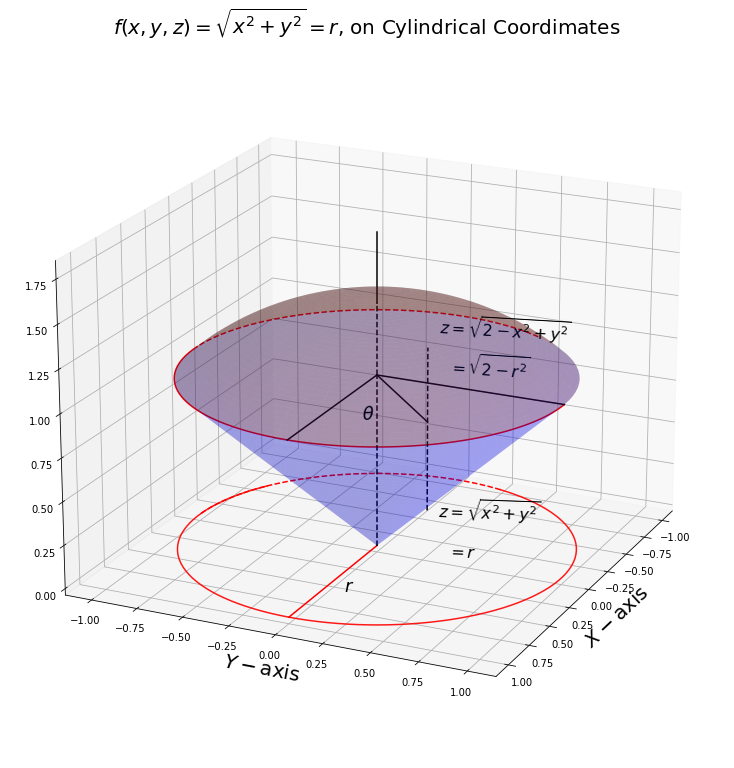

In [56]:
# viz sqrt(x^2+y^2) on Cylindrical Coordinate
fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)


# Spherical roof
TS=np.linspace(0,2*np.pi,101)
PS=np.linspace(0,np.pi/4,101)
TS,PS=np.meshgrid(Tc,PS)
RS=np.sqrt(2)
XS=RS*np.cos(TS)*np.sin(PS)
YS=RS*np.sin(TS)*np.sin(PS)
ZS=RS*np.cos(PS)
ax.plot_surface(XS, YS, ZS, alpha=0.3,color='brown')

# conic bottom
Rc=np.linspace(0,1,101)
Tc=np.linspace(0,2*np.pi,101)
Rc,Tc=np.meshgrid(Rc,Tc)

X_=Rc*np.cos(Tc)
Y_=Rc*np.sin(Tc)
f_=Rc
ax.plot_surface(X_, Y_, f_, alpha=0.2,color='blue')


xb=np.linspace(-np.pi/2,np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb, 1+0*Xb,'r')

xb=np.linspace(5*np.pi/6,3*np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb, 1+0*Xb, 'r--')

xb=np.linspace(-4*np.pi/6,11*np.pi/12,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb,   0*Xb, alpha=0.9,color='red')
xb=np.linspace(11*np.pi/12,3*np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb,   0*Xb,'r--')


ax.plot([0,r0],[0,0],[0,0],'r')

r0=1
ax.plot([0,0],[0,0],[r0,RS],'k--',)
ax.plot([0,0],[0,0],[RS,RS+0.4],'k',)
ax.plot([0,0],[0,0],[0,r0],'k--')
ax.plot([0,np.sqrt(r0)],[0,0],[r0,r0],'k',)
ax.plot([0,0],[0,np.sqrt(r0)],[r0,r0],'k')
ax.plot([0,1/2],[0,1/2],[r0,r0],'k')
ax.plot([1/2,1/2],[1/2,1/2],[1/2,RS],'k--')

ax.text(0.6,0.2, 1, '$\\theta$', (0,1,0.2),size=18)
ax.text(0.6,0.1, 0, '$r$', (0,1,0.2),size=18)

ax.text(0.6,0.6, 1.5, '$z=\sqrt{2-x^2+y^2}$', (0,1,0.1),size=16)
ax.text(0.6,0.65, 1.3, '$=\sqrt{2-r^2}$', (0,1,0.1),size=16)
ax.text(0.6,0.6, 0.5, '$z=\sqrt{x^2+y^2}$', (0,1,0.15),size=16)
ax.text(0.6,0.65, 0.3, '$= r$', (0,1,0.15),size=16)

plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)

plt.title("$f(x,y,z)=\sqrt{x^2+y^2}=r$, on Cylindrical Coordimates",size=20)
ax.view_init(elev=20, azim=25)
plt.show()

In [115]:
#
f=r**2
X=[r,Theta,z]
XR=[[0,1],[0,2*pi],[r,sqrt(2-r**2)]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Spherical Coordinates
---
1. $\sqrt{x^2+y^2}=\sqrt{\rho^2\sin^2\phi}=\rho\sin\phi$, $|J|=\rho^2\sin\phi$
2. $(x,y,z)=(\rho\cos\theta\sin\phi,\rho\sin\theta\sin\phi,\rho\cos\phi)$
3. $ \sqrt{x^2 + y^2}\le z$ and $x^2+y^2+z^2 = 2$. imply
$$ \large{\rho\sin\phi\le \rho\cos\phi, x^2+y^2+z^2\le2\Rightarrow 0\le \rho\le\sqrt2,0\le\theta\le2\pi,0\le\phi\le\pi/4}$$
4. $$\large{\iiint_V \sqrt{x^2+y^2} d V= \iiint_V {\rho\sin\phi}\cdot \rho^2\sin\phi d \rho d\theta d\phi}$$

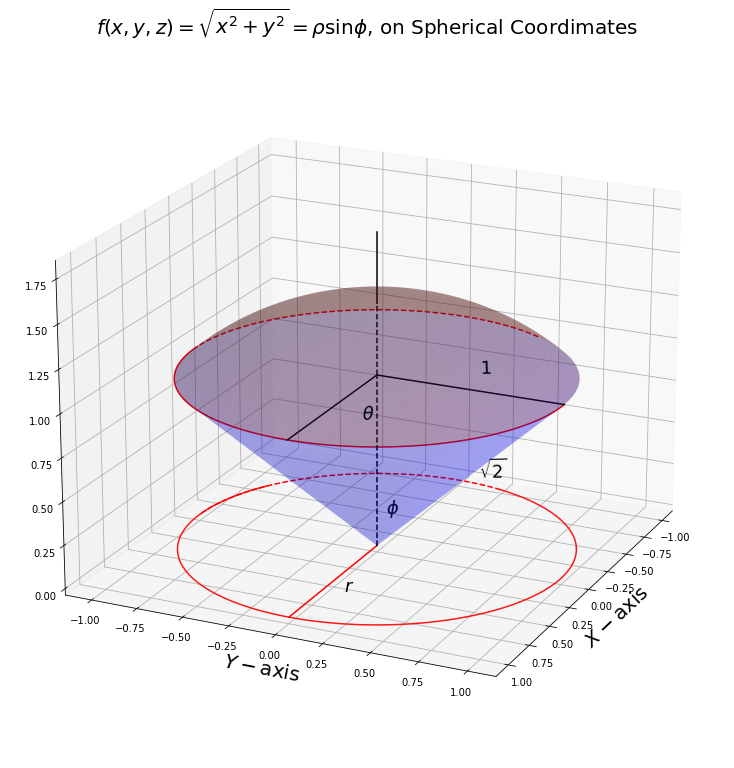

In [74]:
# viz sqrt(x^2+y^2) on Cylindrical Coordinate
fig = plt.figure(figsize=[10,10])
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)


# Spherical roof
TS=np.linspace(0,2*np.pi,101)
PS=np.linspace(0,np.pi/4,101)
TS,PS=np.meshgrid(Tc,PS)
RS=np.sqrt(2)
XS=RS*np.cos(TS)*np.sin(PS)
YS=RS*np.sin(TS)*np.sin(PS)
ZS=RS*np.cos(PS)
ax.plot_surface(XS, YS, ZS, alpha=0.3,color='brown')

# conic bottom
Rc=np.linspace(0,1,101)
Tc=np.linspace(0,2*np.pi,101)
Rc,Tc=np.meshgrid(Rc,Tc)

X_=Rc*np.cos(Tc)
Y_=Rc*np.sin(Tc)
f_=Rc
ax.plot_surface(X_, Y_, f_, alpha=0.2,color='blue')


xb=np.linspace(-np.pi/2,np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb, 1+0*Xb,'r')

xb=np.linspace(5*np.pi/6,3*np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb, 1+0*Xb, 'r--')

xb=np.linspace(-4*np.pi/6,11*np.pi/12,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb,   0*Xb, alpha=0.9,color='red')
xb=np.linspace(11*np.pi/12,3*np.pi/2,101)
Xb=np.cos(xb)
Yb=np.sin(xb)

ax.plot(Xb, Yb,   0*Xb,'r--')


ax.plot([0,r0],[0,0],[0,0],'r')

r0=1
ax.plot([0,0],[0,0],[r0,RS],'k--',)
ax.plot([0,0],[0,0],[RS,RS+0.4],'k',)
ax.plot([0,0],[0,0],[0,r0],'k--')
ax.plot([0,np.sqrt(r0)],[0,0],[r0,r0],'k',)
ax.plot([0,0],[0,np.sqrt(r0)],[r0,r0],'k')
#ax.plot([0,1/2],[0,1/2],[r0,r0],'k')
#ax.plot([1/2,1/2],[1/2,1/2],[1/2,RS],'k--')

ax.text(0.6,0.2, 1, '$\\theta$', (0,1,0.2),size=18)
ax.text(0.6,0.1, 0, '$r$', (0,1,0.2),size=18)
ax.text(0.,0.55, 1.1, '$1$', (0,1,0.2),size=18)
ax.text(0.,0.55, 0.5, '$\sqrt{2}$', (0,1,0.2),size=18)
ax.text(0.,0.05, 0.2, '$\phi$', (0,1,0.2),size=18)
plt.xlabel("$X-$axis",size=20)
plt.ylabel("$Y-$axis",size=20)

plt.title("$f(x,y,z)=\sqrt{x^2+y^2}=\\rho\sin\phi$, on Spherical Coordimates",size=20)
ax.view_init(elev=20, azim=25)
plt.show()

In [42]:
# 2021-06-01, $\int_V sqrt(x^2+y^2) dxdydz spherical Coordinates$
f=rho*sin(phi)*rho**2*sin(phi)
X=[rho,Theta,phi]
XR=[[0,sqrt(2)],[0,2*pi],[0,pi/4]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Example
---
Also evaluate triple integral of 
$$\large{\iiint_V \color{red}{\sqrt{x^2+y^2} }d V }$$
where $V$ is bounded by $ {x^2 + y^2}\le 3z$ and $x^2+y^2+z^2 = 2^2=4$.

Now at the intersction part of $ {x^2 + y^2}= 3z$ and $x^2+y^2+z^2 = 4$, we have:
$$ {x^2 + y^2}= 3z,x^2+y^2+z^2 = 4\Rightarrow z^2+3z=4\to z=1\text{ and }r=\sqrt{x^2+y^2}=\sqrt3$$  
The solid region can be represented in cylindrical coordinates as:

\begin{eqnarray*}
      r \le z \le \sqrt{4-r^2} &  & \\
      0 \le r \le\sqrt3 &  & \\
      0 \le \theta \leq 2 \pi &  & 
    \end{eqnarray*}
and
$$ f(x,y,z)= \color{red}{\sqrt{x^2+y^2}}=r, J=r$$

In [42]:
# 2021-06-01, $\int_V sqrt(x^2+y^2) dxdydz$
f=rho*sin(phi)*rho**2*sin(phi)
X=[rho,Theta,phi]
XR=[[0,sqrt(2)],[0,2*pi],[0,pi/4]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [116]:
from sympy import Piecewise,asin,atan
#
f=r**2
X=[r,Theta,z]
XR=[[0,sqrt(3)],[0,2*pi],[r,sqrt(4-r**2)]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [119]:
4*integrate((sin(2*x))**2,(x,0,pi/3))

sqrt(3)/4 + 2*pi/3

In [80]:
def surface(f_,X_,Y_,title="function"):
    X0=X_
    Y0=0.5+Y_*0
    Z0=f_+0*X_
    X_,Y_=np.meshgrid(X_,Y_)
    fig=go.Scatter3d(x=X0,y=Y0,z=Z0)
    fig = go.Figure(
              data = [go.Surface(x=X_,y=Y_,z=f_+0*X_, opacity=0.5)]                                  
         )
    
    fig.add_scatter3d(x=X0,y=Y0,z=Z0,mode='lines')
    fig.update_layout(
       title = title,
       title_x=0.22,
    )
    fig.show()

In [107]:
eps=1e-6
X_=np.linspace(0,1,101)
Y_=np.linspace(0,1,101)
X_,Y_=np.meshgrid(X_,Y_)
f_=np.exp(X_/(Y_+eps))

R_=np.where(X_<=Y_**3,f_,np.nan)
R_=np.where(R_<5,R_,np.nan)
# surfsce of function
#R1=np.where(Y*Y<=X,func,np.nan)
#R=np.where(X<=Y+2,R1,np.nan)
#fig=go.Scatter3d(x=X_,y=Y_,z=R_)
fig = go.Figure(
              data = [go.Surface(x=X_,y=Y_,z=R_+0*X_, opacity=0.5)] , 

      )
#fig.add_scatter3d(x=X_,y=Y_,z=R_,mode='lines')
fig.add_traces(go.Surface(x=X_,y=Y_,z=0*R_+0*X_, opacity=0.5))
fig.add_traces(go.Scatter3d(x=[0,0],y=[0,0],z=[0,3], opacity=0.5,line = dict(color = 'blue', dash="dot",width=1)))
fig.update_layout(
       title = "$\exp(x/y)$",
       title_x=0.22,
)
fig.show()
#ax.plot_surface(X,Y, R, rstride=1, cstride=1, cmap=cm.jet,alpha=0.3
#surface(f_,X_,Y_,title="$\sin(x+y^2)$") 

<ipython-input-107-fdfcb5a680e6>:5: RuntimeWarning:

overflow encountered in exp



In [103]:
fig.add_traces?

In [79]:
# exp(x/y)
a=symbols("a")
f=exp(x/y)
X=[y,x]
XR=[[0,a],[0,y**3]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [77]:
2.712**4/2-2.5

24.54760062156801

The last one is also equal to 
$$2\pi\left( \displaystyle \frac{\sqrt{3}}{4} + \frac{2 \pi}{3}- \frac{9}{4}\right)$$

At the last integration with respect to $r$, we can integrate by 
1. substitution method. i.e. $u=2-r^2$ with $du=2rdr$
2. trigonmetric subtitution methd, i.e. $u=\sqrt2 \sin\theta$.

In [7]:
!jupyter nbconvert --to html --CodeFoldingPreprocessor.remove_folded_code=True 2021-06-01.ipynb

[NbConvertApp] Converting notebook 2021-06-01.ipynb to html
[NbConvertApp] Writing 5382809 bytes to 2021-06-01.html


In [108]:
# exp(x/y)
a,b=symbols("a,b")
f=1-x**2/2-y**2/2
X=[x,y]
XR=[[0,a],[0,b]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [111]:
# exp(x/y)
a,b=symbols("a,b")
f=1-x**2/2-y**2/2
X=[x,y]
XR=[[0,a/2],[0,2*x]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [113]:
# exp(x/y)
a,b=symbols("a,b")
f=1-x**2/2-y**2/2
X=[y,x]
XR=[[0,6],[y,6+y]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Mutiple Integral on General Domain(supplement)
---
$$ \large{\iint_D xy dA}$$
where
1. [$D=\{0\le x\le4,0\le y \le2\}$, Rectangular-Region](#Rectangular-Region)
2. [$D=\{0\le x\le4,0\le y \le x/2\}$, Lower Triangular Region](#Lower-Triangular-Region)
3. [$D=\{0\le y\le2,0\le x \le 2y\}$, Upper Triangular Region](#Upper-Triangular-Region)
4. [$D=\{0\le |x+2y|,|x-2y|\le4\}$, Diamond Region](#Diamond-Region)


Rectangular Region
---

In [203]:
# Rectangle Area
#t = np.linspace(-1, 1, 100)
x_ = np.array([0,4,4,0,0])
y_ = np.array([0,0,2,2,0])
xm,XM = x_.min(),x_.max()
ym,yM = y_[0].min(),y_.max()

N = 10
sx_ = np.linspace(xm, xM, N)
xx0 = sx_
yy0 = np.array([ym,yM])
sy_ = np.linspace(ym, yM, N)
yy1 = sy_
xx1 = np.array([xm,xM])

# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x_, y=y_,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x_, y=y_,
                     mode="lines+text",
                     name="$0\le y\le 2\\text{ for } x\in[0,4]$",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x_, y=y_,
                     mode="lines+text",
                     name="$0\le y\le 2\\text{ for } x\in[0,4]$",
                     line=dict(width=2, color="blue")),
         ],
    layout=go.Layout(
        xaxis=dict(range=[xm-1, xM+1], autorange=False, zeroline=False),
        yaxis=dict(range=[ym-1/2, yM+1/2], autorange=False, zeroline=False),
        title_text="Fubinit's Iterated Integration", hovermode="x",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
               data=[go.Scatter(
                         x=np.array([xx0[k],xx0[k]]), y=yy0,
                         mode="lines+text",
                         name="$0\le y\le 2$",
                         line=dict(width=2, color="red")),
                     go.Scatter(
                         x=[xx0[k]],
                         y=[1],
                         mode="text",
                         name="$y$",
                         text=["$0\le y\le2$"],
                         textposition="top center"
                     )
                    ])          
               for k in range(N)]
    
)

fig.show()

In [148]:
# exp(x/y)
a,b,x,y=symbols("a,b,x,y")
f=x*y
X=[x,y]
XR=[[0,4],[0,2]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Lower Triangular Region
---

In [174]:
# Triangular Area
#t = np.linspace(-1, 1, 100)
x_ = np.array([0,4,4,0])
y_ = np.array([0,0,2,0])
xm,XM = x_.min(),x_.max()
ym,yM = y_[0].min(),y_.max()

N = 20
sx_ = np.linspace(xm, xM, N)
xx0 = sx_
yy0 = np.array([ym,])


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x_, y=y_,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x_, y=y_,
                     mode="lines+text",
                     name="$0\le y\le x/2\\text{ for } x\in[0,4]$",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x_, y=y_,
                     mode="lines+text",
                     name="$0\le y\le x/2\\text{ for } x\in[0,4]$",
                     line=dict(width=2, color="blue")),
         ],
    layout=go.Layout(
        xaxis=dict(range=[xm-1, xM+1], autorange=False, zeroline=False),
        yaxis=dict(range=[ym-1/2, yM+1/2], autorange=False, zeroline=False),
        title_text="Fubinit's Iterated Integration", hovermode="x",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
               data=[go.Scatter(
                         x=np.array([xx0[k],xx0[k]]), y=np.array([ym,xx0[k]/2]),
                         mode="lines+text",
                         name="$0\le y\le x/2$",
                         line=dict(width=2, color="red")),
                     go.Scatter(
                         x=[xx0[k]],
                         y=[1],
                         mode="text",
                         name="$y$",
                         text=["$0\le y\le x/2$"],
                         textposition="top center"
                     )
                    ])          
               for k in range(N)]
    
)

fig.show()

In [147]:
# xy, 

f=x*y
X=[x,y]
XR=[[0,4],[0,x/2]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Upper Triangular Region
---

In [178]:
# Triangular Area
#t = np.linspace(-1, 1, 100)
x_ = np.array([0,4,0,0])
y_ = np.array([0,2,2,0])
xm,XM = x_.min(),x_.max()
ym,yM = y_[0].min(),y_.max()

N = 20
sx_ = np.linspace(xm, xM, N)
xx0 = sx_
yy0 = np.array([ym,])


# Create figure
fig = go.Figure(
    data=[go.Scatter(x=x_, y=y_,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x_, y=y_,
                     mode="lines+text",
                     name="$0\le x\le 2y\\text{ for } y\in[0,2]$",
                     line=dict(width=2, color="blue")), 
          go.Scatter(x=x_, y=y_,
                     mode="lines+text",
                     name="$0\le x\le 2y\\text{ for } y\in[0,2]$",
                     line=dict(width=2, color="blue")),
         ],
    layout=go.Layout(
        xaxis=dict(range=[xm-1, xM+1], autorange=False, zeroline=False),
        yaxis=dict(range=[ym-1/2, yM+1/2], autorange=False, zeroline=False),
        title_text="Fubinit's Iterated Integration", hovermode="x",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
               data=[go.Scatter(
                         x=np.array([xm,xx0[k]]), y=np.array([xx0[k]/2,xx0[k]/2]),
                         name="$0\le x\le 2y$",
                         mode="lines+text",
                         line=dict(width=2, color="red")),
                     go.Scatter(
                         x=[2],
                         y=[xx0[k]/2+0.15],
                         mode="text",
                         name="$x$",
                         text=["$0\le x\le2y$"],
                         textposition="top center"
                     )
                    ])          
               for k in range(N)]
    
)

fig.show()

In [149]:
# xy, 

f=x*y
X=[y,x]
XR=[[0,2],[0,2*y]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

Diamond Region
---

In [205]:
# Diamond Area
#t = np.linspace(-1, 1, 100)
x_ = np.array([0,4,0,-4,0])
y_ = np.array([-2,0,2,0,-2])
xm,XM = x_.min(),x_.max()
ym,yM = y_[0].min(),y_.max()

N = 21
sx_ = np.linspace(xm, xM, N)

x0_,y0_=[],[]
text0=[]
text1=[]
for k in range(N):
   x0_.append([sx_[k],sx_[k]])
   if (k<N/2):
       y0_.append([(sx_[k]-xm)/2,(-sx_[k]+xm)/2]) 
       text0.append("$-4\le x\le0, -x/2-2\le y\le2+x/2$")
       text1.append("$-x/2-2\le y\le2+x/2$") 
   else:
       y0_.append([(sx_[k]/2-yM),(-sx_[k]/2+yM)])
       text0.append("$0\le x\le4, x/2-2\le y\le2-x/2$")
       text1.append("$x/2-2\le y\le2-x/2$")

# Create figure
fig = go.Figure(
    data=[# init 
          go.Scatter(x=x_, y=y_,
                     mode="lines",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x_, y=y_,
                     mode="lines",
                     name="$-4\le x-2y\le 4,-4\le x+2y\le 4$",
                     line=dict(width=2, color="blue")),
          go.Scatter(x=x_, y=y_,
                     mode="lines",
                     name="$-4\le x-2y\le 4,-4\le x+2y\le 4$",
                     line=dict(width=2, color="blue")),
         ],
    layout=go.Layout(
        xaxis=dict(range=[xm-1, xM+1], autorange=False, zeroline=True),
        yaxis=dict(range=[ym-0.5, yM+0.5], autorange=False, zeroline=False),
        title_text="Fubinit's Iterated Integration", hovermode="x",
        updatemenus=[dict(type="buttons",
                          buttons=[dict(label="Play",
                                        method="animate",
                                        args=[None])])]),
    frames=[go.Frame(
               data=[go.Scatter(
                         x=np.array(x0_[k]), y=np.array(y0_[k]),
                         name=text0[k],
                         mode="lines+text",
                         line=dict(width=2, color="red")),
                      go.Scatter(
                         x=[3*(x0_[k][0]//5)+1.5],
                         y=[0.5],
                         mode="text",
                         name="$y$",
                         text=[text1[k]],                          
                         textposition="top center"
                     )   
                    ]) 
               for k in range(N)]
    
)

fig.show()

<details>
<summary>
 <a class="btnfire small stroke"><em class="fas fa-chevron-circle-down"></em>
    <font size="6em"> $\large{\iint_D xy dA}$</font>
  </a>

Since the domain can be not decribed by one conditions of mathematical expresions, but two ones, seperated by $x=0$, the integration have to be evaluated by sum of two iterated integrals as follows: 
</summary>
$$\large{\iint_D xy dA=\int_{-4}^0dx\int^{x/2+2}_{-x/2-2}xy dy +\int^{4}_0dx\int^{x/2-2}_{2-x/2}xy dy}$$
</details>

**Fubini Iterated  Integration.** 

In [151]:
# xy, 

f=x*y
X=[x,y]
XR=[[0,4],[-2-x/2,2+x/2]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>

In [152]:
# xy, 

f=x*y
X=[x,y]
XR=[[-4,0],[x/2-2,2-x/2]]

MultipleIntegral(f,X,XR)

<IPython.core.display.Latex object>